Detectando Fraudes em bases de dados
(em Python): Modelo Benford

In [ ]:
#dontpad.com/python_benford
# usar modelo Benford
#!python --version

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
caminho_aluguel = "/content/sample_data/alugueis_br.csv"
caminh_covid = "/content/sample_data/covid_mundo.csv"
caminho_ec1 = "/content/sample_data/ecommerce_1.csv"
caminho_ec2 = "/content/sample_data/ecommerce_2.csv"
caminho_livro = "/content/sample_data/livros.csv"
caminho_youtube = "/content/sample_data/youtube.csv"


In [ ]:
import pandas as pd

In [ ]:
df_youtube = pd.read_csv(caminho_youtube)
df_youtube[10:12]

,title,views,likes,dislikes,comment_count
10,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,81377.0,655.0,25.0,177.0
11,(SPOILERS) 'Shiva Saves the Day' Talked About ...,104578.0,1576.0,303.0,1279.0


In [ ]:
df_ec1 = pd.read_csv(caminho_ec1)
df_ec1.tail()

,payment_type,payment_installments,payment_value
103881,boleto,1,363.31
103882,credit_card,2,96.80
103883,credit_card,1,47.77
103884,credit_card,5,369.54
103885,boleto,1,191.58


In [ ]:
df_ec2 = pd.read_csv(caminho_ec2)
df_ec2.head(2)

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [ ]:
#3. Análise Exploratória de Dados
#Descrição de dados estatísticos
#Filtrar as tabelas pelas colunas
#Aplicar um comando na coluna
#Visualização de Gráficos

In [ ]:
#shape = formato
df_aluguel = pd.read_csv(caminho_aluguel)
df_aluguel.shape


(6080, 10)

In [ ]:
print(str(df_aluguel.shape[0]) + "Linhas na base de dados")

6080Linhas na base de dados


In [ ]:
#shape te dá o tamanho de linhas e colunas da base de dados
print(str(df_ec1.shape[1]) + " Colunas na base de dados")

3 Colunas na base de dados


In [ ]:
df_ec2.columns

Index(['product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
df_livro = pd.read_csv(caminho_livro)
df_livro.head(2)

,Reviews,Book_title,Number_Of_Pages,Price
0,3829,The Elements of Style,105,9.323529
1,1406,"The Information: A History, a Theory, a Flood",527,11.000000


In [ ]:
df_livro["Price"]

0        9.323529
1       11.000000
2       11.267647
3       12.873529
4       13.164706
          ...    
266    203.108823
267    212.097059
268    220.385294
269    220.385294
270    235.650000
Name: Price, Length: 271, dtype: float64

In [ ]:
df_youtube.describe()

,views,likes,dislikes,comment_count
count,2.931900e+04,2.931900e+04,2.931900e+04,2.931900e+04
mean,1.482102e+06,5.110715e+04,2.792433e+03,6.258848e+03
std,4.417280e+06,1.537791e+05,3.194887e+04,3.082987e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.604280e+05,3.449000e+03,1.390000e+02,4.305000e+02
50%,4.554520e+05,1.259700e+04,4.370000e+02,1.347000e+03
75%,1.267980e+06,3.750650e+04,1.381000e+03,4.023000e+03
max,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06


In [ ]:
#fazendo análises exploratórias (códigos acima e abaixo)

df_aluguel.describe()

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,151.143914,2.492599,2.341612,1.756250,5.672204,1088.426480,4395.844408,490.333388,58.204276,6033.194572
std,375.559485,1.129665,1.438860,1.611909,6.168918,3981.357627,3576.668946,6212.564538,49.313441,8751.347700
min,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,58.000000,2.000000,1.000000,1.000000,0.000000,24.500000,1800.000000,33.000000,23.000000,2451.500000
50%,100.000000,3.000000,2.000000,1.000000,4.000000,650.000000,3111.000000,145.000000,41.000000,4128.500000
75%,200.000000,3.000000,3.000000,2.000000,9.000000,1436.000000,5952.500000,458.000000,77.000000,8074.000000
max,24606.000000,10.000000,10.000000,12.000000,99.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [ ]:
df_ec1["payment_value"]

0          99.33
1          24.39
2          65.71
3         107.78
4         128.45
           ...  
103881    363.31
103882     96.80
103883     47.77
103884    369.54
103885    191.58
Name: payment_value, Length: 103886, dtype: float64

In [ ]:
df_ec2

,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...
32946,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
df_youtube.describe()

,views,likes,dislikes,comment_count
count,2.931900e+04,2.931900e+04,2.931900e+04,2.931900e+04
mean,1.482102e+06,5.110715e+04,2.792433e+03,6.258848e+03
std,4.417280e+06,1.537791e+05,3.194887e+04,3.082987e+04
min,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.604280e+05,3.449000e+03,1.390000e+02,4.305000e+02
50%,4.554520e+05,1.259700e+04,4.370000e+02,1.347000e+03
75%,1.267980e+06,3.750650e+04,1.381000e+03,4.023000e+03
max,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06


In [ ]:
#LEI DE BENFORD
#Análise Estatística
#Indicar de possivel: fraude, ordens de regras especificas, cenarios especificos, descaso, falta de conhecimento


In [ ]:
import math

In [ ]:

for digito in range(1,10):
  print(digito)

1
2
3
4
5
6
7
8
9


In [ ]:
for digito in range(1,10):
  print(math.log10(1 + 1/digito))

0.3010299956639812
0.17609125905568124
0.12493873660829992
0.09691001300805642
0.07918124604762482
0.06694678963061322
0.05799194697768673
0.05115252244738129
0.04575749056067514


In [ ]:
#list comprehension - for dentro da lista

lista_benford = [math.log10( 1 + 1/digito) for digito in range(1,10)]
lista_benford

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829992,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514]

In [ ]:
def primeiro_digito(numero):
  return str(numero)[0]

primeiro_digito(50)

'5'

In [ ]:
df_livro["Number_Of_Pages"].apply(primeiro_digito)

0      1
1      5
2      5
3      3
4      3
      ..
266    7
267    1
268    8
269    3
270    7
Name: Number_Of_Pages, Length: 271, dtype: object

In [ ]:
def freq_coluna(coluna):
  df_primeiro_digito = coluna.apply(primeiro_digito)
  df_primeiro_digito = df_primeiro_digito.value_counts(normalize = True)
  return df_primeiro_digito.sort_index()

In [ ]:
freq_coluna(df_livro["Number_Of_Pages"])

1    0.132841
2    0.180812
3    0.284133
4    0.136531
5    0.092251
6    0.051661
7    0.051661
8    0.033210
9    0.036900
Name: Number_Of_Pages, dtype: float64

,Benford,Real
1,0.301030,0.132841
2,0.176091,0.180812
3,0.124939,0.284133
4,0.096910,0.136531
5,0.079181,0.092251
6,0.066947,0.051661
7,0.057992,0.051661
8,0.051153,0.033210
9,0.045757,0.036900


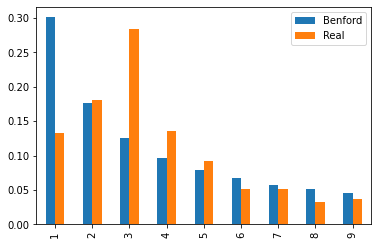

In [ ]:
def benford(coluna):
  df_comparacao = pd.DataFrame(index = [str(i) for i in range(1,10)])
  #Esperado pelo Benford
  df_comparacao["Benford"] = lista_benford
  df_comparacao["Real"] = freq_coluna(coluna)
  df_comparacao.plot.bar()
  return df_comparacao

benford(df_livro["Number_Of_Pages"])

In [ ]:
df_ec1.columns

Index(['payment_type', 'payment_installments', 'payment_value'], dtype='object')

,Benford,Real
1,0.301030,0.331931
2,0.176091,0.138671
3,0.124939,0.107724
4,0.096910,0.086970
5,0.079181,0.079087
6,0.066947,0.079144
7,0.057992,0.066342
8,0.051153,0.057842
9,0.045757,0.050690


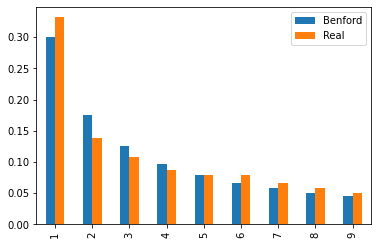

In [ ]:
benford(df_ec1["payment_value"])

In [ ]:
#ok